Importing the libraries:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing:

In [2]:
#loading the file into pandas dataframe:
df = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#printing the first five rows:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#printing the last five rows:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns:
df.shape

(2290, 6)

In [9]:
#more information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#statistical measure of dataset:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#checking the missing values of the dataset:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation:

Positive Correlation

Negative Correlation

In [12]:
correlation = df.corr()

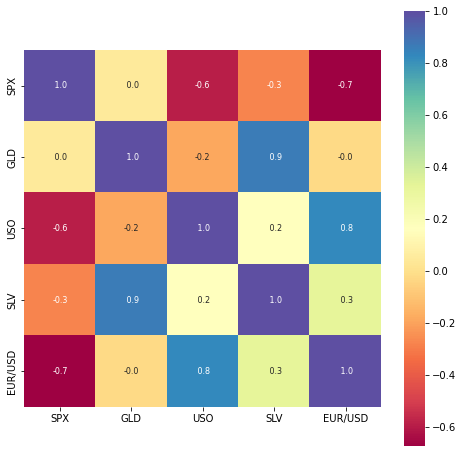

In [15]:
#constructing a heatmap to understand the correlation:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=' .1f', annot=True, annot_kws= {'size' :8}, cmap="Spectral")

In [17]:
#correlation values of GLD:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


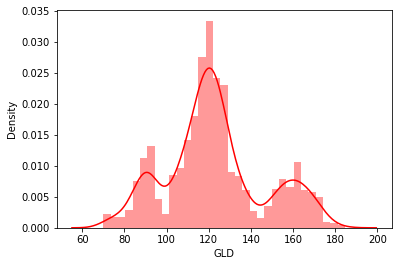

In [22]:
#checking the distribution of the GLD price:
sns.distplot(df['GLD'], color = "red")

Splitting the feature and the Target

In [24]:
X = df.drop(['Date', 'GLD'], axis = 1)
Y = df['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [27]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (1832,)


Model Training --> Random Forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators = 1000)

In [33]:
#training the model:
regressor.fit(X,Y)

RandomForestRegressor(n_estimators=1000)

Model Evaluation

In [41]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.33335224  81.61881195 113.04680994 127.57250788 120.16326218
 154.11876445 149.23408164 126.19849136 117.40834039 125.87466871
 115.61615861 167.83709705 141.57506252 168.85547815 115.41131881
 118.97876912 134.99251928 170.17019671 159.44471707 165.24864957
 154.87507067 127.27826677 176.16775051 157.08757252 125.276309
  93.67482134  76.8496008  119.91927143 119.03958871 167.42014919
  87.77249032 125.10544191  91.22535215 116.28304883 120.95050785
 134.3951386  116.24385175 114.42195902 138.02625105 106.27902093
 105.01342242  87.5742188  126.66898017 117.06504041 157.23424679
 119.56855932 109.11321207 108.4574513   93.31595844 127.14006178
  73.01180144 113.50664034 119.86566995 109.97315911 119.13463841
 120.27018181 159.92157959 163.4627235  146.6735222   85.94086858
  93.9355395   85.96767176  90.93735928 118.64697899 126.43695817
 127.20282174 170.5534577  122.390061   116.9509819   98.19921928
 169.17529356 142.88246872 132.05067947 121.24792099 123.52830975
 119.7370083

In [43]:
#R squared error:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9987258300642152


Compare the actual values and predicted values in a Plot


In [44]:
Y_test = list(Y_test)

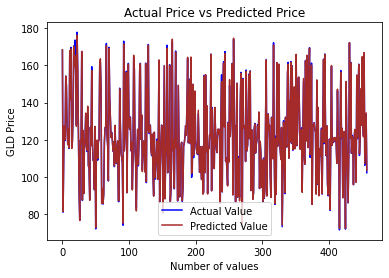

In [47]:
plt.plot(Y_test, color = "blue", label = 'Actual Value')
plt.plot(test_data_prediction, color = 'brown', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
